In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd .read_csv('/content/ChurnData.csv')
data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [35]:
data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [37]:
data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [63]:
data = pd.read_csv('/content/ChurnData.csv')
data =data[['tenure', 'age', 'address', 'employ', 'lninc', 'internet', 'ebill', 'loglong', 'churn']]
data['churn']= data['churn'].astype('int')
data['churn'].dtype

dtype('int64')

In [64]:
type(data)

pandas.core.frame.DataFrame

In [65]:
data['churn'].dtype

dtype('int64')

In [66]:
data.columns = data.columns.str.strip()

In [67]:
#X =np.asarray (data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

X =np.asarray (data[['tenure', 'age', 'address', 'employ', 'lninc', 'internet', 'ebill', 'loglong']])
X[0:5]

array([[11.   , 33.   ,  7.   ,  5.   ,  4.913,  0.   ,  0.   ,  1.482],
       [33.   , 33.   , 12.   ,  0.   ,  3.497,  0.   ,  0.   ,  2.246],
       [23.   , 30.   ,  9.   ,  2.   ,  3.401,  0.   ,  0.   ,  1.841],
       [38.   , 35.   ,  5.   , 10.   ,  4.331,  1.   ,  1.   ,  1.8  ],
       [ 7.   , 35.   , 14.   , 15.   ,  4.382,  0.   ,  0.   ,  1.96 ]])

In [68]:
y= np.asarray(data['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [69]:
X_norm=StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 , -0.58477841,  1.28150384,
        -0.88640526, -0.88640526, -0.97509593],
       [-0.11604313, -0.62595491,  0.03454064, -1.14437497, -0.60481397,
        -0.88640526, -0.88640526,  0.07226665],
       [-0.57928917, -0.85594447, -0.261522  , -0.92053635, -0.73269992,
        -0.88640526, -0.88640526, -0.48294519],
       [ 0.11557989, -0.47262854, -0.65627219, -0.02518185,  0.50619525,
         1.12815215,  1.12815215, -0.53915182],
       [-1.32048283, -0.47262854,  0.23191574,  0.53441472,  0.57413466,
        -0.88640526, -0.88640526, -0.31980887]])

In [70]:
X_train,X_test,y_train, y_test=train_test_split(X_norm,y,test_size=0.2, random_state=4)

In [71]:
LR = LogisticRegression().fit(X_train,y_train)

In [72]:
y_hat=LR.predict(X_test)
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [73]:
y_hat_prob= LR.predict_proba(X_test)
y_hat_prob[:10]

array([[0.70510167, 0.29489833],
       [0.92114817, 0.07885183],
       [0.86689123, 0.13310877],
       [0.84141761, 0.15858239],
       [0.82453944, 0.17546056],
       [0.70661125, 0.29338875],
       [0.46208346, 0.53791654],
       [0.92475145, 0.07524855],
       [0.26478508, 0.73521492],
       [0.79137067, 0.20862933]])

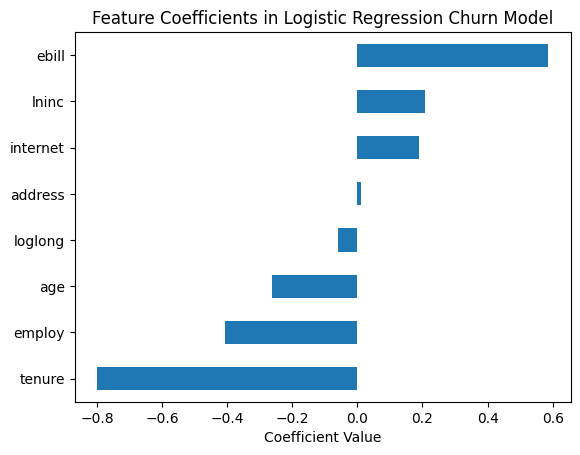

In [74]:
feature_names = ['tenure', 'age', 'address', 'employ', 'lninc', 'internet', 'ebill', 'loglong']
cofficients=pd.Series(LR.coef_[0], index=feature_names)
cofficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [75]:
log_loss(y_test,y_hat_prob)

0.5698076664757182